# Leitura e tratamento de dados

In [1]:
import pandas as pd
data = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")



substituição de nomes de classes 

In [17]:
import pandas as pd

# Carregar os dados
data = pd.read_csv(r'../analises\dataset_binario_short_category.csv')

# Dicionário de substituições para novas categorias
substituicoes = {
    "Presentes e Viagens":"Flores e plantas"
    
    
}

# Aplicar as substituições na coluna Text2
data['Text2'] = data['Text2'].replace(substituicoes)

# Verificar os valores únicos após a substituição
print(data['Text2'].unique())

# Salvar a base de dados atualizada
data.to_csv(r'../analises\dataset_binario_short_category.csv', index=False)


['Joias e bijuterias' 'Casa e Decoração' 'peixaria e Pescados'
 'Itens para Adultos como brinquedos sexuais' 'Materiais de Construção'
 'Produtos Alimentícios Básicos' 'Decoração para Festas'
 'Padaria e Confeitaria' 'Moda e Acessórios' 'Óculos e itens para oculos'
 'Papelaria e Escritório' 'Veículos automotores incluindo carros e motos'
 'Bebidas Alcoólicas' 'Ferramentas e Equipamentos' 'Doces e Chocolates'
 'Livros e Materiais Literários' 'Itens de Coleção' 'eletrodomésticos'
 'Eletrônicos e Gadgets' 'Beleza e Autocuidado'
 'comidas rápidas e fastfood' 'produtos para pets e animais domésticos'
 'Saúde e Bem-Estar' 'Brinquedos e Jogos Educativos'
 'Peças e Acessórios Automotivos' 'Flores e plantas' 'Fotografia'
 'Consoles e Jogos' 'Esportes e Fitness' 'Instrumentos Musicais'
 'pizzaria']


padronizar dataset removendo espaços e deixando em lowercase

In [18]:
# Remover espaços extras e padronizar para minúsculas
data['Text1'] = data['Text1'].str.strip().str.lower()
data['Text2'] = data['Text2'].str.strip().str.lower()
data.to_csv(r'../analises\dataset_binario_short_category.csv', index=False)

lematização do dataset

In [5]:
import pandas as pd
import re
from unidecode import unidecode

def preprocess_text_safely(text):
    try:
        # Remover acentos
        text = unidecode(text)
        # Remover caracteres especiais, mantendo apenas letras, números e espaços
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        # Converter para minúsculo
        text = text.lower()
        # Remover múltiplos espaços e espaços no início/fim
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Se o texto ficar vazio, retorna None
        return text if text else None
    except Exception:
        return None

# Carregar dataset
df = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")

# Converter colunas para string e aplicar pré-processamento
df['Texto'] = df['Texto'].astype(str).apply(preprocess_text_safely)
df['Label'] = df['Label'].astype(str).apply(preprocess_text_safely)

# Remover linhas onde Texto ou Label ficaram como None
df.dropna(subset=['Texto', 'Label'], inplace=True)
df.dropna(subset=["Label"], inplace=True)

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Contar quantos registros por label
label_counts = df['Label'].value_counts()
print(label_counts)  # Apenas para visualizar no console

# Resetar índices após remoções
df.reset_index(drop=True, inplace=True)

# Salvar o novo dataset
df.to_csv(r"../analises/dataset_transformado_not_lema.csv", index=False)


Label
equipamentos para panificacao                 338
ingredientes para panificacao                 338
motos                                         320
carros                                        313
barbearia                                     311
eletronicos e gadgets                         309
autopecas para motos                          306
sorveteria                                    304
reforco escolar                               304
cama mesa e banho                             303
construcao civil                              303
geleia                                        302
materiais de construcao                       301
agua                                          301
assistencia tecnica em celulares              301
venda de imoveis                              301
baterias automotivas                          301
oculos e itens para oculos                    300
servicos de desenvolvimento de software       300
agencia de marketing                        

In [133]:
import pandas as pd
import re
from unidecode import unidecode

def preprocess_text_safely(text):
    try:
        # Remover acentos
        text = unidecode(text)
        # Remover caracteres especiais, mantendo apenas letras, números e espaços
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        # Converter para minúsculo
        text = text.lower()
        # Remover múltiplos espaços e espaços no início/fim
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Se o texto ficar vazio, retorna None
        return text if text else None
    except Exception:
        return None

# Carregar dataset
df = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")

# Converter colunas para string e aplicar pré-processamento
df['Texto'] = df['Texto'].astype(str).apply(preprocess_text_safely)
df['Label'] = df['Label'].astype(str).apply(preprocess_text_safely)

# Remover linhas onde Texto ou Label ficaram como None
df.dropna(subset=['Texto'], inplace=True)
df.dropna(subset=["Label"], inplace=True)

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Identificar linhas que começam com os padrões
patterns = r'^(preciso de|onde encontro|onde acho|quero um|quero uma)'
matching_rows = df[df['Texto'].str.match(patterns, na=False)]

# Selecionar 70% dessas linhas aleatoriamente
rows_to_modify = matching_rows.sample(frac=0.7, random_state=42)

# Substituir os padrões iniciais por uma string vazia apenas nessas linhas
df.loc[rows_to_modify.index, 'Texto'] = df.loc[rows_to_modify.index, 'Texto'].str.replace(patterns, '', regex=True).str.strip()

# Contar quantos registros por label (opcional)
label_counts = df['Label'].value_counts()
print(label_counts)

# Resetar índices após modificações
df.reset_index(drop=True, inplace=True)

# Salvar o novo dataset
df.to_csv(r"../analises/dataset_transformado_not_lema.csv", index=False)


Valores únicos em 'Label':
['baterias automotivas' 'produtos para pets e animais domesticos' 'agua'
 'instrumentos musicais' 'itens de colecao' 'moveis' 'fotografia'
 'design de produtos' 'materiais de construcao' 'trabalhos cientificos'
 'padaria e confeitaria' 'eletrodomesticos' 'consorcio' 'troca de oleo'
 'auto escola' 'grafica' 'suplementos' 'bebidas alcoolicas'
 'venda de imoveis' 'doces e chocolates'
 'assistencia tecnica em celulares' 'refrigeracao automotiva'
 'flores e plantas' 'geleia' 'eletronicos e gadgets'
 'veiculos automotores incluindo carros e motos'
 'ingredientes para panificacao' 'ferramentas e equipamentos' 'hortifruti'
 'papelaria e escritorio' 'pecas e acessorios automotivos' 'gas'
 'oculos e itens para oculos' 'livros e materiais literarios'
 'decoracao para festas' 'construcao civil' 'tintas'
 'agencia de marketing' 'servicos de desenvolvimento de software'
 'pizzaria' 'joias e bijuterias' 'celulares e smartphones' 'servico de dj'
 'beleza e autocuidado' 'sush

embaralhando dataset

In [6]:

data = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")
df_embaralhado = data.sample(frac=1, random_state=42).reset_index(drop=True)
df_embaralhado.to_csv(r"../analises/dataset_transformado_not_lema.csv", index=False)

# Analise

In [686]:
data.sort_values(by=['Label'], inplace=True)
data.head()

,Text1,Text2,Label
0,pitbull,alimentação e bebidas,0
6867,Procurando um cinto de couro masculino,carros motos peças e acessorios para veículos,0
6866,regador,alimentação e bebidas,0
6865,Ração para cães Pedigree,casa e decoração,0
6863,Câmera fotográfica,alimentação e bebidas,0


In [687]:
# Estatísticas descritivas da coluna 'Label'
print(data['Label'].describe())


count    12379.000000
mean         0.502464
std          0.500014
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64


Distribuição por rotulo

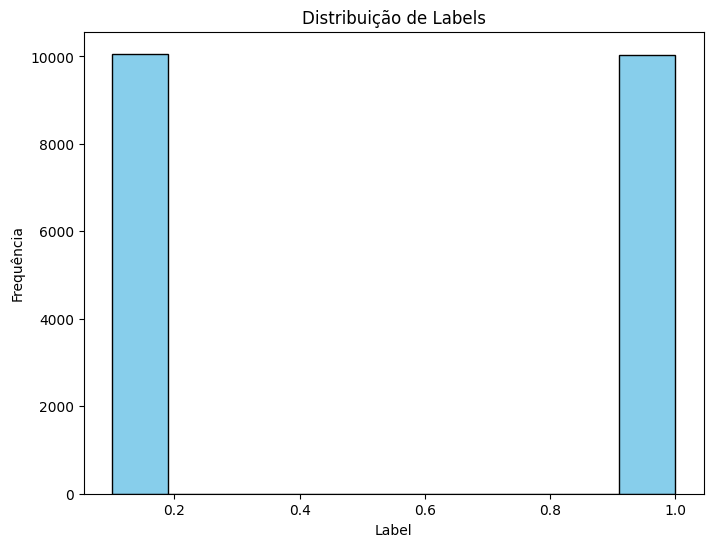

In [67]:
import matplotlib.pyplot as plt

# Histogram para a coluna 'Label'
plt.figure(figsize=(8, 6))
plt.hist(data['Label'], color='skyblue', edgecolor='black')
plt.title('Distribuição de Labels')
plt.xlabel('Label')
plt.ylabel('Frequência')

plt.show()


Distribuição por classe 

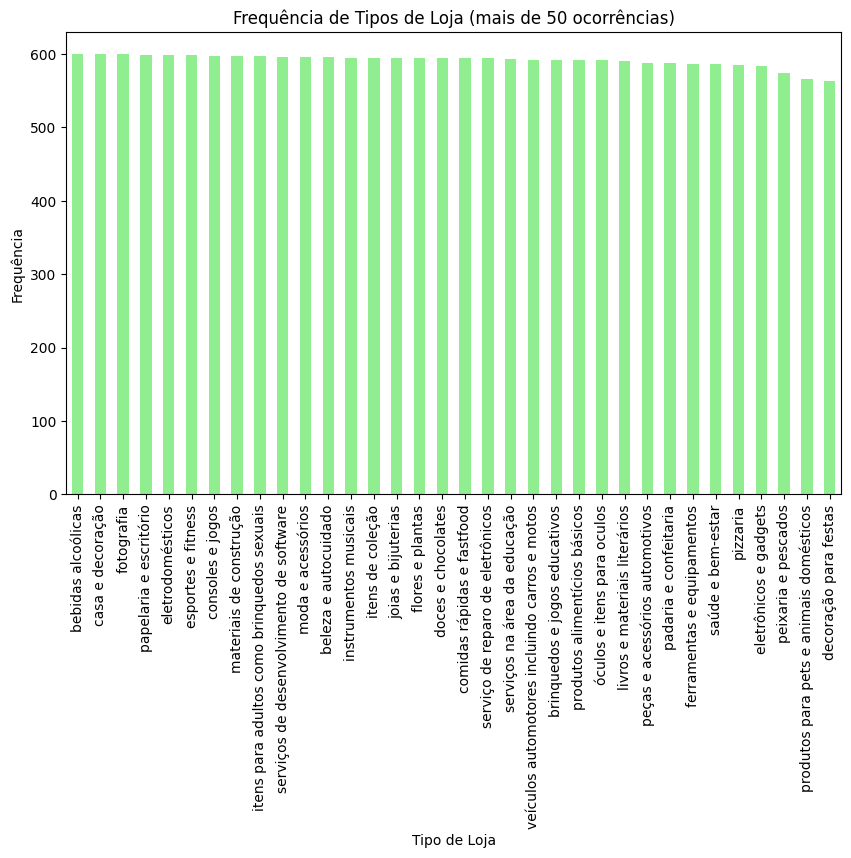

In [66]:

text2_counts = data['Text2'].value_counts()

lojas_mais_que_100 = text2_counts[text2_counts < 1000].index

data_filtered = data.loc[data['Text2'].isin(lojas_mais_que_100)]

plt.figure(figsize=(10, 6))
text2_counts_filtered = data_filtered['Text2'].value_counts()
text2_counts_filtered.plot(kind='bar', color='lightgreen')
plt.title('Frequência de Tipos de Loja (mais de 50 ocorrências)')
plt.xlabel('Tipo de Loja')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()


In [122]:
import pandas as pd

unique_text2 = data['Text2'].unique()


In [265]:
# Verificar se há valores não-string na coluna Texto
print(df[~df["Texto"].apply(lambda x: isinstance(x, str))])

# Verificar se há valores não-string na coluna Label
print(df[~df["Label"].apply(lambda x: isinstance(x, str))])


Empty DataFrame
Columns: [Texto, Label]
Index: []
                                  Texto Label
2303   celulares e smartphones faltam 4   NaN
3554        doces e chocolates faltam 1   NaN
7449                  acougue faltam 13   NaN
8508    eletronicos e gadgets faltam 97   NaN
8887               auto escola faltam 1   NaN
10265     baterias automotivas faltam 1   NaN


In [5]:
import pandas as pd
data = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")


label_counts_filtered = data.drop_duplicates().groupby('Label').count()
# Configurações para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Exibe todas as linhas
pd.set_option('display.max_columns', None)  # Exibe todas as colunas

# Agora é possível visualizar o dataframe completo
print(label_counts_filtered)


                                            Texto
Label                                            
acougue                                       296
agencia de marketing                          300
agua                                          301
aluguel de imoveis                            299
assistencia tecnica em celulares              301
assistencia tecnica em computadores           299
auto escola                                   300
autopecas para carros                         300
autopecas para motos                          306
barbearia                                     311
baterias automotivas                          301
bebidas alcoolicas                            298
beleza e autocuidado                          300
brinquedos e jogos educativos                 300
cama mesa e banho                             303
carros                                        313
celulares e smartphones                       289
consorcio                                     298


In [4]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")

# Remover todas as linhas onde o Label seja "servico de reparo de eletronicos"
data_filtered = data[data['Label'] != "veiculos automotores incluindo carros e motos"]

# Salvar o dataset atualizado
data_filtered.to_csv(r"../analises/dataset_transformado_not_lema.csv", index=False)

print("Linhas removidas com sucesso. Novo arquivo salvo como dataset_transformado_not_lema_filtrado.csv")


Linhas removidas com sucesso. Novo arquivo salvo como dataset_transformado_not_lema_filtrado.csv


In [226]:
import pandas as pd

# Carregar o dataset
file_path = r'..\analises\dataset_binario_short_category_balanced_lema.csv' 
df = pd.read_csv(file_path)

# Filtrar apenas as linhas com Label = 1.0
df_filtrado = df[df['Label'] == 1.0]

# Criar novo dataset com formato desejado
df_transformado = df_filtrado[['Text1', 'Text2']]
df_transformado.columns = ['Texto', 'Label']

# Salvar como novo arquivo CSV
df_transformado.to_csv('dataset_transformado_not_lema.csv', index=False)

print("Dataset transformado com sucesso!")


Dataset transformado com sucesso!


In [24]:
import pandas as pd
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Carregar o dataset
data = pd.read_csv(r"../analises\dataset_transformado_not_lema.csv")

# Selecionar os primeiros 10 itens por categoria
categoria_itens = data.groupby('Label').head(20)

# Criar um dicionário com listas de frases por categoria
categorias = {}
for label, group in categoria_itens.groupby('Label'):
    categorias[label] = group['Texto'].tolist()

# Criar PDF
output_file = "relacao_categorias_10itens.pdf"
pdf = SimpleDocTemplate(output_file, pagesize=A4)
elements = []
styles = getSampleStyleSheet()

# Adicionar Título
title = Paragraph("Relação de Categorias e Frases (20 por Categoria)", styles['Title'])
elements.append(title)
elements.append(Spacer(1, 20))

# Adicionar Tabela de Categorias e Frases
for categoria, itens in categorias.items():
    # Título da Categoria
    elements.append(Paragraph(f"<b>{categoria}</b>", styles['Heading2']))
    elements.append(Spacer(1, 20))
    
    # Criar tabela com frases
    tabela_data = [[f"{i+1}. {frase}"] for i, frase in enumerate(itens)]
    tabela = Table(tabela_data)
    
    # Estilizar tabela
    tabela.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
        ('BACKGROUND', (0, 0), (-1, -1), colors.whitesmoke),
    ]))
    
    elements.append(tabela)
    elements.append(Spacer(1, 20))  # Espaço entre categorias

# Construir PDF
pdf.build(elements)

print(f"PDF gerado com sucesso: {output_file}")


PDF gerado com sucesso: relacao_categorias_10itens.pdf


In [38]:
data = pd.read_csv(r"../analises/dataset_transformado_not_lema.csv")
data.groupby('Label').nunique().count()

Texto    56
dtype: int64

In [3]:
import requests
import sqlite3
import pandas as pd

# URL do banco de dados
url = "https://acho-ia.jm2.tec.br/download_db"

# Caminho onde o banco será salvo
db_path = "downloaded_db.sqlite"

def download_and_overwrite_db(url, output_path):
    """
    Faz o download do banco de dados e sobrescreve o arquivo existente.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(output_path, "wb") as file:
            file.write(response.content)
        print(f"Banco de dados atualizado e salvo em: {output_path}")
    else:
        raise Exception(f"Erro ao baixar o banco: {response.status_code}")

def list_tables_and_display(db_path):
    """
    Lista as tabelas do banco e exibe o conteúdo de cada uma.
    """
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    
    if tables:
        print("Tabelas no banco de dados:")
        for table in tables:
            print(f"- {table[0]}")
        
        # Visualizando dados da primeira tabela como exemplo
        table_name = tables[0][0]  # Pega a primeira tabela
        print(f"\nExibindo os primeiros registros da tabela '{table_name}':")
        df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
        print(df.head())  # Mostra as primeiras linhas
    else:
        print("Não há tabelas no banco de dados.")
    
    conn.close()


try:
    download_and_overwrite_db(url, db_path)
    list_tables_and_display(db_path)
except Exception as e:
    print(f"Erro: {e}")


Banco de dados atualizado e salvo em: downloaded_db.sqlite
Tabelas no banco de dados:
- query_response
- sqlite_sequence

Exibindo os primeiros registros da tabela 'query_response':
   id                 query  degree_of_certainty    category category_id  \
0   1    jogo de cartas uno                 1.00  Brinquedos           3   
1   2  quero um camaro novo                 0.94    Peixaria          25   
2   3  quero um camaro 2008                 1.00      Carros          13   
3   4       quero um prisma                 0.06  Fotografia          18   
4   5  quero um prisma 2006                 1.00      Carros          13   

            created_at  
0  2025-01-24 18:44:05  
1  2025-01-24 18:44:32  
2  2025-01-24 18:44:45  
3  2025-01-24 18:44:58  
4  2025-01-24 18:45:08  


In [4]:
import sqlite3
import pandas as pd
import json


db_path = r"downloaded_db.sqlite"
conn = sqlite3.connect(db_path)
df = pd.read_sql("SELECT * FROM query_response", conn)

conn.close()
print(df)


   id                 query  degree_of_certainty    category category_id  \
0   1    jogo de cartas uno                 1.00  Brinquedos           3   
1   2  quero um camaro novo                 0.94    Peixaria          25   
2   3  quero um camaro 2008                 1.00      Carros          13   
3   4       quero um prisma                 0.06  Fotografia          18   
4   5  quero um prisma 2006                 1.00      Carros          13   
5   6        quero um peixe                 1.00    Peixaria          25   

            created_at  
0  2025-01-24 18:44:05  
1  2025-01-24 18:44:32  
2  2025-01-24 18:44:45  
3  2025-01-24 18:44:58  
4  2025-01-24 18:45:08  
5  2025-01-24 18:46:44  
